<a href="https://www.kaggle.com/code/sarahhudaib/medical-insurance-charges?scriptVersionId=101631862" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical/medical_insurance_charges.csv


# **Step 1: Import the datasets into dataframes,**

In [162]:
df = pd.read_csv('../input/medical/medical_insurance_charges.csv')
df.head()

,patientid,age,sex,bmi,children,smoker,region,charges
0,10001,19,female,27.9,0,yes,southwest,16884.92
1,10002,18,male,33.8,1,no,southeast,1725.55
2,10003,28,male,33.0,3,no,southeast,4449.46
3,10004,33,male,22.7,0,no,northwest,21984.47
4,10005,32,male,28.9,0,no,northwest,3866.86


# **Step 2: Review and understand the meaning of the data (columns)**

**DataType Validation**

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientid  1338 non-null   int64  
 1   age        1338 non-null   int64  
 2   sex        1338 non-null   object 
 3   bmi        1338 non-null   float64
 4   children   1338 non-null   int64  
 5   smoker     1338 non-null   object 
 6   region     1338 non-null   object 
 7   charges    1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [164]:
df.shape

(1338, 8)

**Basic Statistics Analysis - count, min, max, and mean**

In [165]:
df.describe()

,patientid,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,10669.500000,39.207025,30.665471,1.094918,13270.422414
std,386.391641,14.049960,6.098382,1.205493,12110.011240
min,10001.000000,18.000000,16.000000,0.000000,1121.870000
25%,10335.250000,27.000000,26.300000,0.000000,4740.287500
50%,10669.500000,39.000000,30.400000,1.000000,9382.030000
75%,11003.750000,51.000000,34.700000,2.000000,16639.915000
max,11338.000000,64.000000,53.100000,5.000000,63770.430000


In [166]:
df.dtypes

patientid      int64
age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
charges      float64
dtype: object

# **Step 3: check on missing values.**

In [167]:
df.isnull().sum()

patientid    0
age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

check on duplicate


In [168]:
duplicate = df[df.duplicated(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])]
duplicate

,patientid,age,sex,bmi,children,smoker,region,charges
581,10582,19,male,30.6,0,no,northwest,1639.56


In [169]:
validate_dup = df[(df['age'] == 19) & (df['charges'] == 1639.5631)]
validate_dup

,patientid,age,sex,bmi,children,smoker,region,charges


Inference
* One duplicates records found

#### Dropping Duplicates

In [170]:
df = df.drop_duplicates()
df.shape

(1338, 8)

Unique values (counts) for each Feature

In [171]:
df.nunique()

patientid    1338
age            47
sex             2
bmi           275
children        6
smoker          2
region          4
charges      1337
dtype: int64

**Unique values (names) are checked for each Features**

In [172]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [173]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [174]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [175]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

Inference
* Data looks fine.

we can see the relationship between age and children with Scatter Plot.

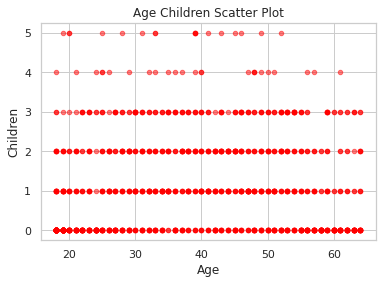

In [176]:
df.plot(kind='scatter', x='age', y='children',alpha = 0.5,color = 'red')
plt.xlabel('Age')              
plt.ylabel('Children')
plt.title('Age Children Scatter Plot')  
plt.show()

lets see how the charges are distributed according to given factors

Text(0.5, 1.0, 'Distribution of Charges')

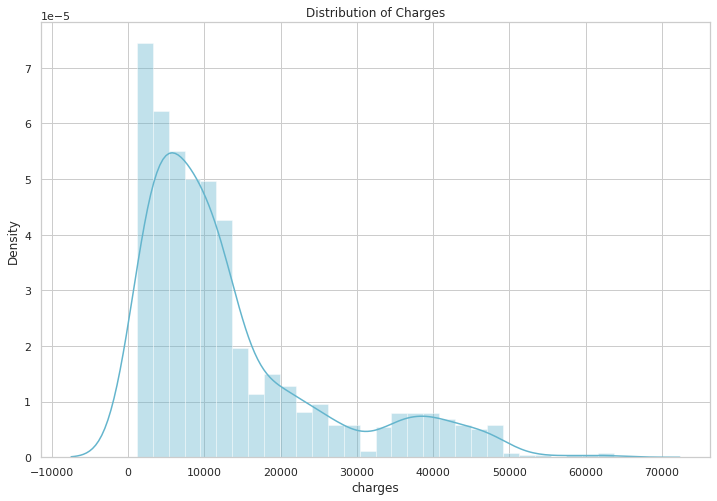

In [177]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

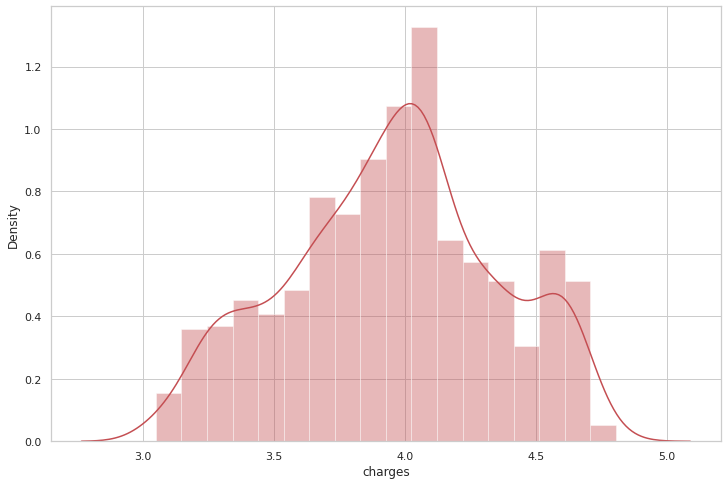

In [178]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

Now let's look at the charges by region

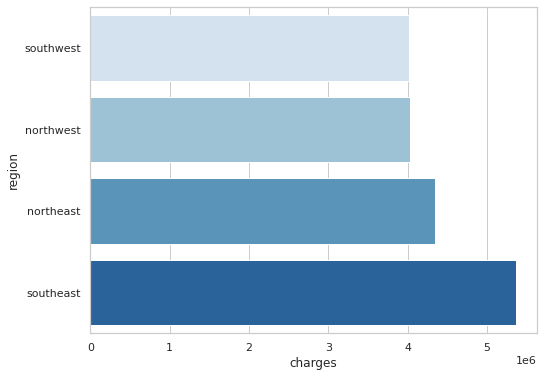

In [179]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

Text(0.5, 1.0, 'Smokers and non-smokers')

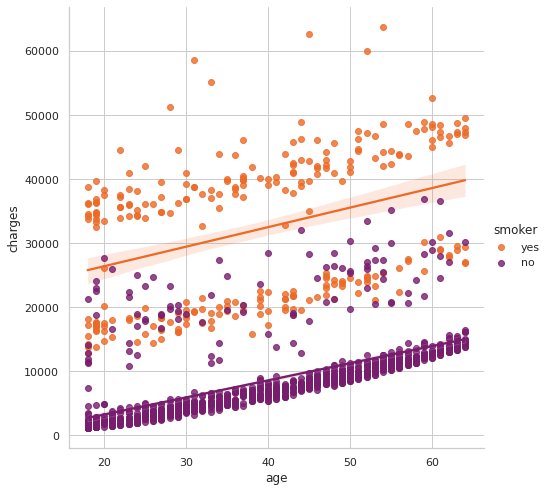

In [180]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

let's analyze the medical charges by age, bmi and children according to the smoking factor

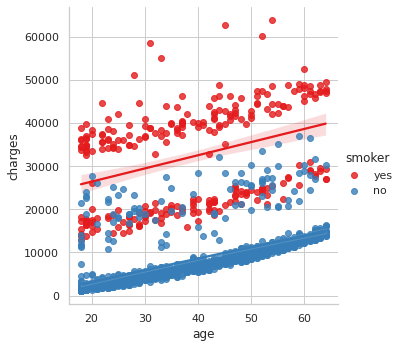

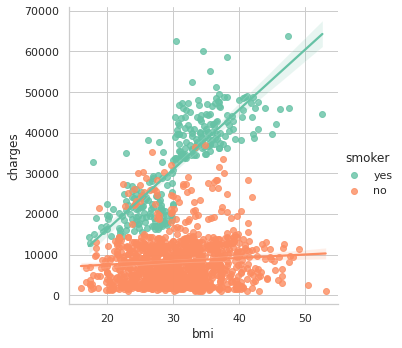

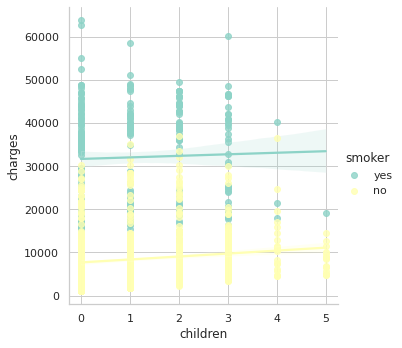

In [181]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

In [182]:
df.tail()

,patientid,age,sex,bmi,children,smoker,region,charges
1333,11334,50,male,31.0,3,no,northwest,10600.55
1334,11335,18,female,31.9,0,no,northeast,2205.98
1335,11336,18,female,36.9,0,no,southeast,1629.83
1336,11337,21,female,25.8,0,no,southwest,2007.95
1337,11338,61,female,29.1,0,yes,northwest,29141.36


lets filter our data and see whos the most smokers gender:

In [183]:
femals=(df['sex']=='female') & (df['smoker']=='yes') & (df['children']>0)
df[femals]

,patientid,age,sex,bmi,children,smoker,region,charges
23,10024,34,female,31.9,1,yes,northeast,37701.88
58,10059,53,female,22.9,1,yes,southeast,23244.79
84,10085,37,female,34.8,2,yes,southwest,39836.52
94,10095,64,female,31.3,2,yes,southwest,47291.06
103,10104,61,female,29.9,3,yes,southeast,30942.19
...,...,...,...,...,...,...,...,...
1218,11219,46,female,34.6,1,yes,southwest,41661.60
1281,11282,47,female,27.6,2,yes,northwest,24535.70
1313,11314,19,female,34.7,2,yes,southwest,36397.58
1314,11315,30,female,23.7,3,yes,northwest,18765.88


and now the males

In [184]:
males=(df['sex']=='male') & (df['smoker']=='yes') & (df['children']>0)
df[males]

,patientid,age,sex,bmi,children,smoker,region,charges
29,10030,31,male,36.3,2,yes,southwest,38711.00
34,10035,28,male,36.4,1,yes,southwest,51194.56
38,10039,35,male,36.7,1,yes,northeast,39774.28
49,10050,36,male,35.2,1,yes,southeast,38709.18
52,10053,48,male,28.0,1,yes,southwest,23568.27
...,...,...,...,...,...,...,...,...
1284,11285,61,male,36.3,1,yes,southwest,47403.88
1288,11289,20,male,39.4,2,yes,southwest,38344.57
1301,11302,62,male,30.9,3,yes,northwest,46718.16
1304,11305,42,male,24.6,2,yes,northeast,21259.38


We can see that the males are losing here :)

In [185]:
X = df.iloc[:,:-1]
y = df['charges']

In [186]:
X.head()

,patientid,age,sex,bmi,children,smoker,region
0,10001,19,female,27.9,0,yes,southwest
1,10002,18,male,33.8,1,no,southeast
2,10003,28,male,33.0,3,no,southeast
3,10004,33,male,22.7,0,no,northwest
4,10005,32,male,28.9,0,no,northwest


In [187]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64

In [188]:
df.head()

,patientid,age,sex,bmi,children,smoker,region,charges
0,10001,19,female,27.9,0,yes,southwest,16884.92
1,10002,18,male,33.8,1,no,southeast,1725.55
2,10003,28,male,33.0,3,no,southeast,4449.46
3,10004,33,male,22.7,0,no,northwest,21984.47
4,10005,32,male,28.9,0,no,northwest,3866.86


Changing 'smoker' column to numerical

In [189]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

Declaring dependent and independent variables

In [190]:
x0 = df[['smoker','bmi', 'age']]
y = df['charges']

In [191]:
x = sm.add_constant(x0)
# OLS - Ordinary Least Squares
results = sm.OLS(y, x).fit()

In [192]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:04:44   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.530    -12.457      0.000   -1.35e+04   -9839.854
smoker      2.382e+04    412.856     57.702      0.000     2.3e+04    2.46e+04
bmi          322.6914     27.486     11.740      0.000     268.771     376.612
age          259.5329     11.934     21.747      0.000     236.122     282.944
==============================================================================
Omnibus:                      299.836   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.645
Skew:                           1.213   Prob(JB):                    4.85e-155
Kurtosis:                       5.619   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Making predictions based on created regression

In [193]:
# creating DataFrame with some values
prediction_data = pd.DataFrame({'const': 1, 'smoker': [1, 0, 0], 'bmi': [21, 39, 51], 'age': [19, 67, 43]})
prediction_data = prediction_data[['const', 'smoker', 'bmi', 'age']]

In [194]:
print(prediction_data)

   const  smoker  bmi  age
0      1       1   21   19
1      1       0   39   67
2      1       0   51   43


Predicting healthcare charges

In [195]:
predictions = results.predict(prediction_data)
print(predictions)

0    23851.204548
1    18294.624606
2    15938.131594
dtype: float64


Joining DataFrames

In [196]:
predictions_df = pd.DataFrame({'Charges': predictions})
predictions_joined = prediction_data.join(predictions_df)

In [197]:
predictions_joined.rename(index = {0: 'Carlos', 1: 'John', 2: 'Christina'})

,const,smoker,bmi,age,Charges
Carlos,1,1,21,19,23851.204548
John,1,0,39,67,18294.624606
Christina,1,0,51,43,15938.131594


In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [199]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientid  1338 non-null   int64  
 1   age        1338 non-null   int64  
 2   sex        1338 non-null   object 
 3   bmi        1338 non-null   float64
 4   children   1338 non-null   int64  
 5   smoker     1338 non-null   int64  
 6   region     1338 non-null   object 
 7   charges    1338 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 126.4+ KB


In [200]:
X = df['charges'].values
X

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [201]:
Y= df['bmi'].values
Y

array([27.9, 33.8, 33. , ..., 36.9, 25.8, 29.1])

In [202]:
x_train, x_test ,y_train, y_test = train_test_split(X,Y, train_size = 0.8, test_size=0.2 , random_state = 15)

x_train ,y_train

#Numpy
x_train=x_train.reshape(-1,1)
x_train
x_test=x_test.reshape(-1,1)
x_test

array([[39774.28],
       [17081.08],
       [ 1824.29],
       [ 2721.32],
       [ 1639.56],
       [ 6313.76],
       [ 3208.79],
       [48885.14],
       [ 6393.6 ],
       [ 6406.41],
       [ 1629.83],
       [ 3443.06],
       [42983.46],
       [40904.2 ],
       [ 4779.6 ],
       [43921.18],
       [15820.7 ],
       [ 7537.16],
       [37484.45],
       [ 6186.13],
       [ 3172.02],
       [ 8615.3 ],
       [12609.89],
       [11381.33],
       [23045.57],
       [19214.71],
       [ 7986.48],
       [30184.94],
       [ 3309.79],
       [ 1711.03],
       [ 6593.51],
       [ 5138.26],
       [ 4894.75],
       [49577.66],
       [ 5272.18],
       [ 2026.97],
       [ 4527.18],
       [ 2741.95],
       [ 3366.67],
       [ 8538.29],
       [ 7046.72],
       [ 8162.72],
       [12979.36],
       [ 1769.53],
       [10702.64],
       [27346.04],
       [12479.71],
       [ 4151.03],
       [ 6289.75],
       [18259.22],
       [ 2709.24],
       [ 4296.27],
       [ 635

In [203]:
# creat our linear regression model

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [204]:
y_predict= model.predict(x_test.reshape(-1,1))
y_predict

array([33.43203892, 31.0869512 , 29.51033306, 29.60303105, 29.49124328,
       29.97426943, 29.6534056 , 34.37354413, 29.98252   , 29.98384377,
       29.4902378 , 29.67761478, 33.76367169, 33.54880348, 29.8157312 ,
       33.86057453, 30.95670506, 30.1006941 , 33.19541067, 29.9610803 ,
       29.64960584, 30.21210778, 30.62490386, 30.49794596, 31.70331435,
       31.30743793, 30.14712628, 32.44108818, 29.66384282, 29.4986289 ,
       30.00317846, 29.85279469, 29.82763066, 34.4451083 , 29.86663382,
       29.53127776, 29.78964642, 29.60516292, 29.66972073, 30.20414966,
       30.05001263, 30.16533871, 30.66308444, 29.50467422, 30.42781096,
       32.1477197 , 30.61145121, 29.75077554, 29.97178827, 31.20869876,
       29.60178271, 29.76578447, 29.97892174, 30.02258961, 30.18439852,
       32.88078644, 29.52535025, 30.79486722, 29.57031502, 30.49955494,
       30.06038681, 31.46567855, 31.00601316, 29.78012996, 31.81299194,
       33.91251467, 29.77807041, 30.16053863, 30.71183554, 31.79

In [205]:
train_accuracy = model.score(x_train,y_train)
train_accuracy

0.042629216606517306

In [206]:
test_accuracy= model.score(x_test,y_test)
test_accuracy

0.02380345025836539

In [207]:
new_data = np.array([34.305557]).reshape(-1,1)
new_data

array([[34.305557]])

In [208]:
model.predict(new_data)

array([29.32535824])

Text(0.5, 1.0, 'X,Y')

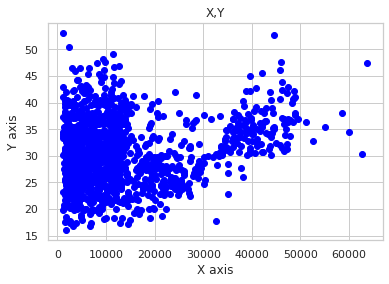

In [209]:
# plot visual analyzing
# X and Y / scatter diagram
%matplotlib inline 
plt.scatter(X,Y, color='blue')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('X,Y')

Text(0.5, 1.0, 'Actual Data vs Predicted Data')

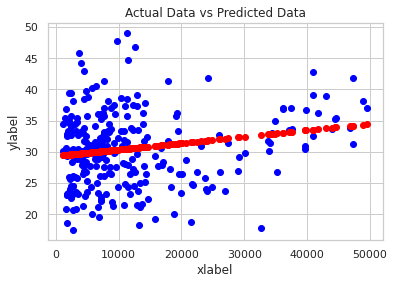

In [210]:
plt.scatter(x_test,y_test, color='blue')
plt.scatter(x_test,y_predict, color='red')

plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('Actual Data vs Predicted Data')

<Figure size 720x720 with 0 Axes>

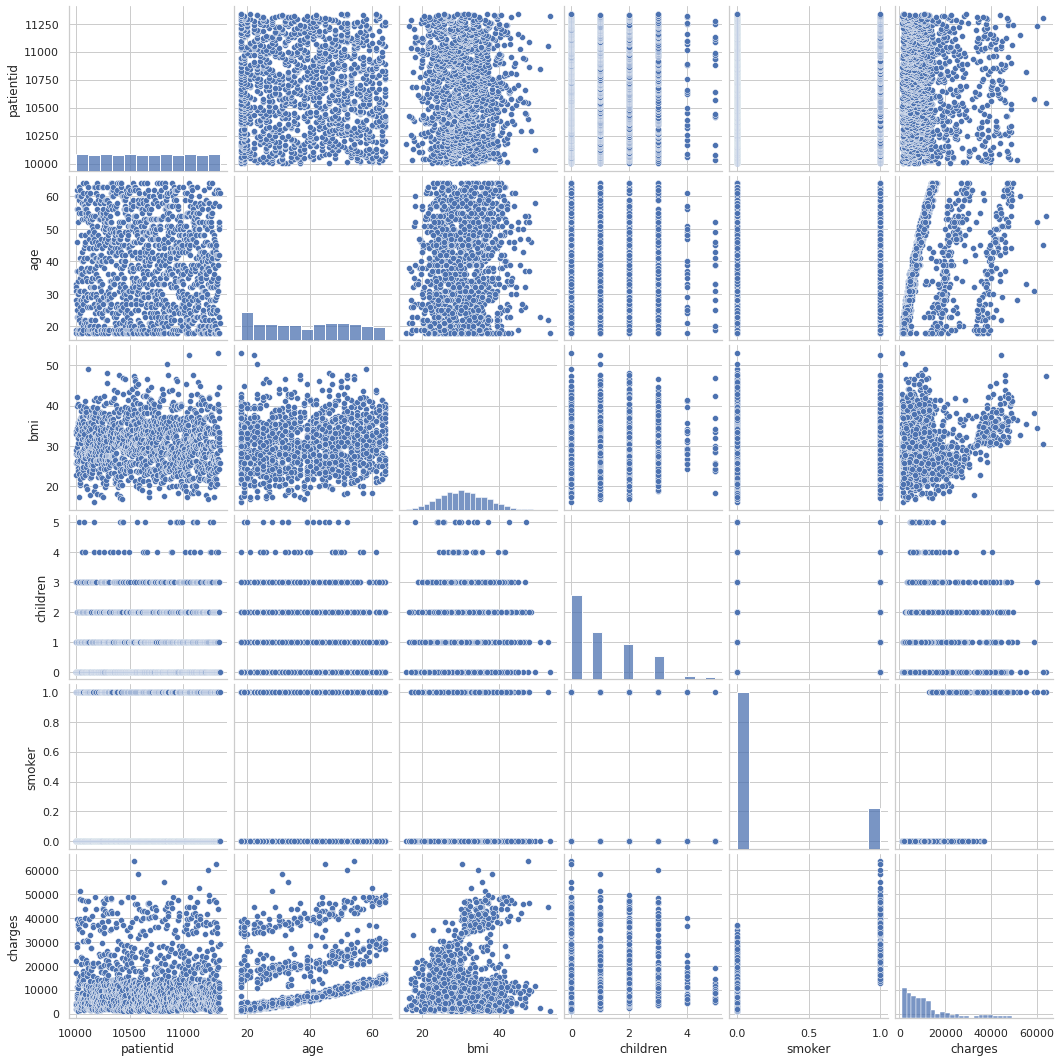

In [211]:
plt.figure(figsize = (10,10))
sns.pairplot(data = df)
plt.show()